## 3. Experimentation with a simple Machine Learning algorithm

In the last exercise, we used a scatterplot to identify the characteristics (or **features**) that can help us determine whether someone is more likely to be a rugby player or a ballet dancer. By exploring the data visually, we learnt that *height* and *weight* can help us with this classification.

In this exercise, we are going to teach a computer to perform this classification, such that when we give it new data, it will be able to say which group the person falls into. To do this, we are going to use the **$k$-nearest neighbour** algorithm, which is one of the simplest algorithms used in Machine Learning.

The data we used are shown in the table below. We're going to use this as our **training** dataset.

|Person|Sex (0/1)|Age |Weight (Kg)|Height (cm)|
|------|---------|----|-----------|-----------|
|     1|        1|  24|         63|        190|
|     2|        1|  20|         55|        185|
|     3|        1|  25|         75|        202|
|     4|        1|  30|         50|        180|
|     5|        1|  19|         57|        174|
|     6|        0|  31|         66|        174|
|     7|        0|  31|         85|        150|
|     8|        0|  28|         93|        145|
|     9|        0|  29|         75|        130|
|    10|        0|  24|         99|        163|
|    11|        0|  30|        100|        171|
|    12|        1|  25|         84|        168|

When we **train** a machine learning algorithm, we do this with **labelled** data, which means that we give it a set of inputs, and tell it what outputs to expect. In this instance, we're going to give our algorithm a set of heights and corresponding weights, and tell it whether the person is a ballet dancer or rugby player. This enables the algorithm to **learn** how tall/heavy ballet dancers and rugby players are, and therefore when a new height and weight is given to it, to **predict** what that person is likely to be.

Execute the cells below to see a graph that shows weight plotted against height. This time, we've labelled the data, so that the rugby players are shown as red triangles, and ballet dancers as blue dots.

The first cell imports the graph library and sets up the data:

In [1]:
#Import the graph library
import matplotlib.pyplot as plt

#label the data for rugby players
rugby_heights = [150, 145, 130, 163, 171, 168]
rugby_weights = [85, 93, 75, 99, 100, 84]

#label the data for ballet dancers
ballet_heights = [190, 185, 202, 180, 174, 174]
ballet_weights = [63, 55, 75, 50, 57, 66]

This second cell configures the graph and displays it:

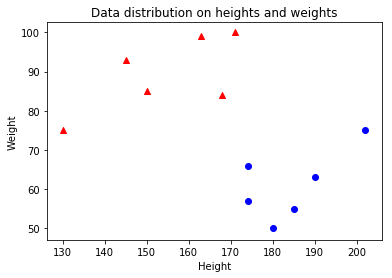

In [2]:
#show the rugby players as red triangles
plt.scatter(rugby_heights, rugby_weights, color = 'red', marker = '^')

#show the ballet dancers as blue dots
plt.scatter(ballet_heights, ballet_weights, color = 'blue')

#give the graph a title
plt.title("Data distribution on heights and weights")

#label the axes
plt.xlabel("Height")
plt.ylabel("Weight")

#display the graph
plt.show()

### Using a machine learning algorithm to perform the classification
Now let's write a program to do make this classification. The **$k$-nearest neighbour algorithm** is designed (as the name suggests), to identify which class a new input belongs to according to its nearest $k$ neighbours. $k$ is a **parameter** that we can set to a particular value. You'll experiment with this later. For now let's set $k$ to 6. 

$k$-nearest neighbour works by calculating the distance between a new data point we give to it, and the existing set of data points it has in its training set. As the training set is labelled, it knows which class the nearest 6 data points belong to. If more of these are rugby players, it will classify the input as a rugby player. If more of them are ballet dancers, it will classify it as a ballet dancer.

To determine how far one data point is from another, we calculate the **Euclidean distance**: $$distance = \sqrt{(x_{point_2} - x_{point_1})^2 + (y_{point_2}-y_{point_1})^2}$$

In this equation, consider $x$ and $y$ as the coordinates of the point in a graph. The algorithm uses this formula to work out the distance between the input point, and the other points in the graph.

First, we need to prepare the data for the machine learning algorithm. To do this, let's put it into a **matrix** (which you can think of as a table that the algorithm can use for referencing data). Execute the cell below.

In [3]:
#Import the libraries we need
import numpy as np
from numpy import *

#Take the heights and weights from the table
height = [190, 185, 202, 180, 174, 174, 150, 145, 130, 163, 171, 168]
weight = [63, 55, 75, 50, 57, 66, 85, 93, 75, 99, 100, 84]

#Create a matrix containing the heights and weights
features_matrix = np.c_[transpose(height), transpose(weight)]

#Create a matrix which contains groundtruth labels for the features.
#Here 0 indicates a rugby player, and 1 indicates a ballet dancer
labels_matrix = transpose([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

#Map the labels to the features, so the algorithm knows which points are ballet dancers and which are rugby players.
training_matrix = np.c_[features_matrix, labels_matrix]

Now let's write the algorithm to classify the data.

In [6]:
#Import the math library to do some of the calculations for us
import math

#Set the value of k (the number of neighbours we want it to use)
k = 6 #!robota:!=:k = 6

#create an empty matrix to hold the distances
distances = np.empty([0,2])

#provide the height/weight input we want to classify
input_weight = 50 #!robota:any:input_weight = 94:input_weight = 67
input_height = 170 #!robota:any:input_weight = 175:input_weight = 165

#For every data point in the training set, calculate the distance it is from the new data point
for training_point in training_matrix:
    distance = math.sqrt((training_point[0] - input_height)**2 + (training_point[1] - input_weight)**2)
    #store the distances
    distances = np.vstack([distances, [distance, training_point[2]]])

#sort the distances from shortest to longest
distances = distances[distances[:,0].argsort()]

#create variables to store the number of neighbours in each class
ballet_dancer = 0
rugby_player = 0

#go through the first k items in the list
for i in range(0, k):
    #if the item in the list has the label '1', this means it is a ballet dancer
    if distances[i][1] == 1:
        #increment the ballet dancer variable
        ballet_dancer = ballet_dancer + 1
    else:
        #if it isn't a ballet dancer, we know it's a rugby player
        rugby_player = rugby_player + 1

#If the value of the ballet_dancer variable is higher, classify as 'Ballet dancer'
if ballet_dancer > rugby_player:
    print("Ballet dancer")
#Otherwise, classify as 'Rugby player'
else:
    print("Rugby player")

# **Feedback**
# Look back at k = 6. We expected the line to be different from k = 6, why don't you try changing it?
# Look back at input_weight = 50. The line should be one of input_weight = 94,input_weight = 67, but it isn't, why not trying changing it?
# Look back at input_height = 170. The line should be one of input_weight = 175,input_weight = 165, but it isn't, why not trying changing it?


Ballet dancer


This table shows statistics from a sample of some French players from the Women's Rugby World Cup:

|Name              |Sex (0/1)|Weight (Kg)|Height (cm)|
|------------------|---------|-----------|-----------|
|Audrey Abadie     |        1|         62|        166|
|Monserrat Amedee  |        1|         68|        174|
|Manon Andre       |        1|         84|        180|
|Julie Annery      |        1|         65|        171| 
|Lise Arricastre   |        1|         83|        165|
|Caroline Boujard  |        1|         67|        173|
|Lenaig Corson     |        1|         85|        185|
|Annaelle Dehayes  |        1|         94|        175|
|Caroline Drouin   |        1|         71|        172|
|Julie Duval       |        1|         71|        161|
|Audrey Forlani    |        1|         82|        176|
|Carla Neisen      |        1|         67|        165|
|Chloe Pelle       |        1|         70|        162|

Are the team always accurately classified when you enter their data?

Enter the data for Julie Duval, and try manipulating $k$ (increasing it and decreasing it). What do you notice happening? Try this for Annaelle Deshayes and Carla Niesen. Use the scatterplot to help you understand why changing $k$ changes how people are classified.